In [3]:
import pandas as pd


import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
data = pd.read_csv('D:\\Downloads\\IMDB_Dataset.csv')



In [5]:
data.dropna(inplace=True)

In [6]:
from nltk.corpus import stopwords

def clean_review(review):
    # Avoid overwriting built-in names like 'str'
    cleaned = ' '.join(word for word in review.split() if word.lower() not in stopwords.words('english'))
    return cleaned


In [7]:
data['review'] = data['review'].apply(clean_review)


In [8]:
print(data.columns)


Index(['review', 'sentiment'], dtype='object')


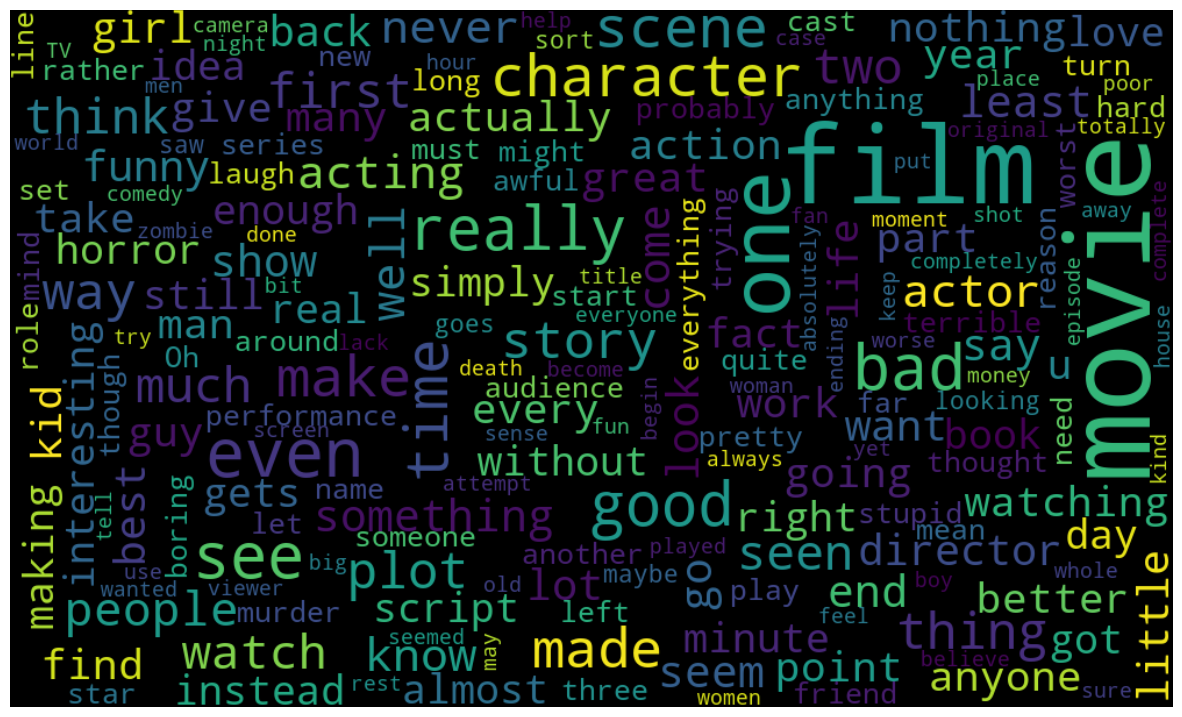

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Prepare the text of negative reviews
reviews = ' '.join(word for word in data['review'][data['sentiment'] == 'negative'].astype(str))

# Generate word cloud
wordcloud = WordCloud(height=600, width=1000, max_font_size=100)

# Plot the word cloud
plt.figure(figsize=(15, 12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()


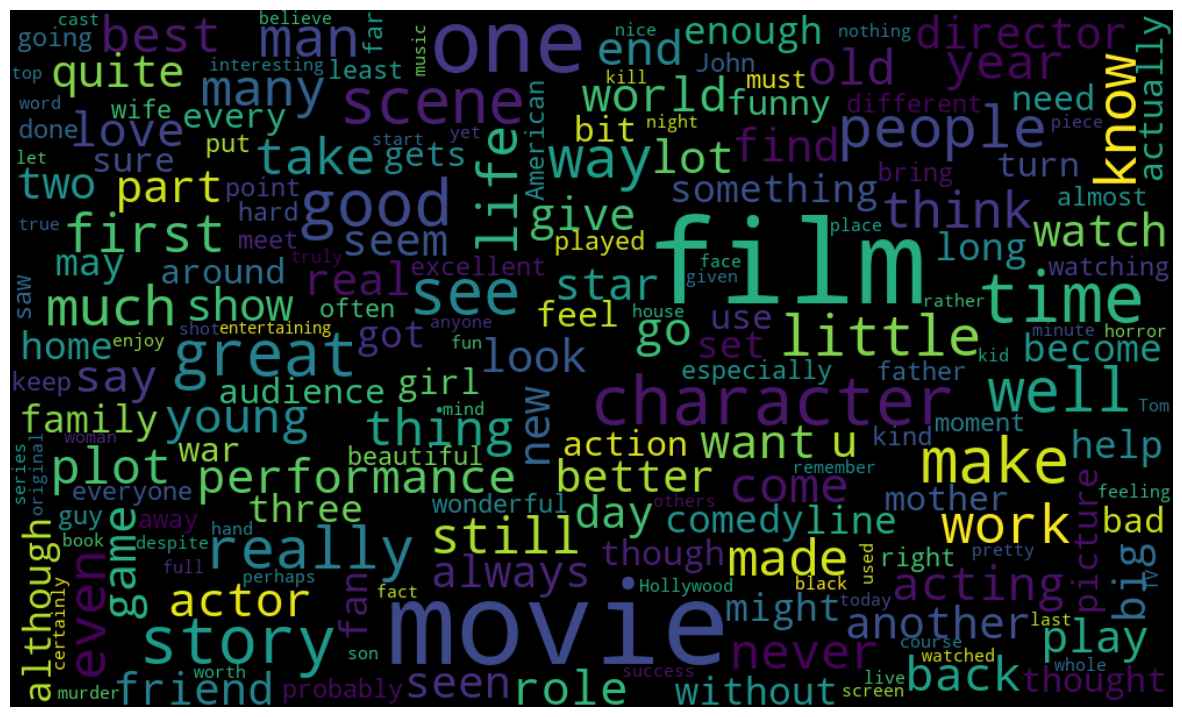

In [10]:
reviews = ' '.join(word for word in data['review'][data['sentiment']== 'positive'].astype(str))
wordcloud = WordCloud(height = 600, width = 1000, max_font_size =100)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=2500)

In [12]:
reviewa = cv.fit_transform(data['review']).toarray()

In [13]:
data['sentiment'] = data['sentiment'].replace(['positive','negative'],[1,0])

C:\Users\HP\AppData\Local\Temp\ipykernel_552\3911524901.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['sentiment'] = data['sentiment'].replace(['positive','negative'],[1,0])


In [14]:
data['sentiment'].value_counts()

sentiment
0    263
1    237
Name: count, dtype: int64

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
model = LogisticRegression()

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
review_train, review_test, sent_train, sent_test = train_test_split(data['review'], data['sentiment'], test_size=0.2, random_state=42)

# Check the sizes of the resulting splits
print(len(review_train), len(review_test))


400 100


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# Step 1: Create a pipeline with TfidfVectorizer and Logistic Regression
model = make_pipeline(TfidfVectorizer(), LogisticRegression())

# Step 2: Train the model with the training data
model.fit(review_train, sent_train)

# Step 3: Now you can make predictions or evaluate the model
predictions = model.predict(review_test)


In [20]:
predict = model.predict(review_test)

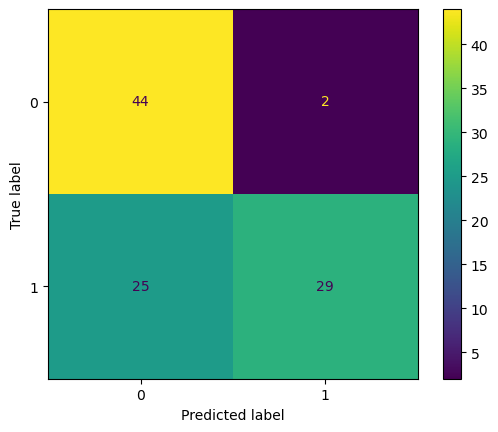

In [21]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(sent_test, predict, labels=model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
display.plot()
plt.show()

In [22]:
import pickle as pk

In [23]:
pk.dump(model,open('model.pkl','wb'))

In [24]:
pk.dump(cv,open('scaler.pkl','wb'))